<a href="https://colab.research.google.com/github/Ritvik10/Titanic-Dataset-EDA/blob/main/EDA_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(style="whitegrid", font_scale=1.75)

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_Id = test['PassengerId']

In [5]:
all_features = pd.concat((train, test), sort = False)

In [6]:
all_features.drop('PassengerId', axis =1, inplace = True)

#Missing Value treatment

In [7]:
missing_values = (all_features.isnull().sum()/all_features.shape[0]  *100).sort_values(ascending = False)
missing_values

Cabin       77.463713
Survived    31.932773
Age         20.091673
Embarked     0.152788
Fare         0.076394
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
dtype: float64

In [8]:
all_features['Age'].fillna(all_features['Age'].mean(), inplace = True)

#Feature Engineering

In [9]:
def expand_embark_acronym(embarked):
    result = []
    mapping = {
            "C": "Cherbourg",
            "S": "Southampton",
            "Q": "Queenstown"
    }
    for each in embarked.values:
        if len(str(each)) > 1:
            result.append(each)
        else:
            if each in mapping:
                result.append(mapping[each])
            else:
                result.append("Unknown")
    return result

def expand_pclass_acronym(pclass):
    result = []
    mapping = {
            1: "1st class",
            2: "2nd class",
            3: "3rd class"
    }
    for each in pclass.values:
        if len(str(each)) > 1:
            result.append(each)
        else:
            if each in mapping:
                result.append(mapping[each])
            else:
                result.append("Unknown")
    return result

def is_a_minor(age):

    if age < 18:
        return "Under 18 (minor)"

    return "Adult"

# See https://help.healthycities.org/hc/en-us/articles/219556208-How-are-the-different-age-groups-defined-
def apply_age_groups(age):
    result = []
    mapping = {
            1: "Infant",      # Infants: <1
           13: "Child",       # Children: <18, <11 or K - 7th grade
           18: "Teen",        # Teens: 13-17 (Teens, who are not Adults)
           66: "Adult",       # Adults: 20+ (includes adult teens: 18+)
           123: "Elderly"     # Elderly: 65+ (123 is the oldest age known till date)
    }
    for each_age in age.values:
        if type(each_age) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_age != np.nan:
                for each_age_range in mapping:
                    if  each_age < each_age_range:
                        category = mapping[each_age_range]
                        break
            result.append(category)
    return result

def apply_age_ranges(age):
    result = []
    mapping = {
            6: "00-05 years",
           12: "06-11 years",
           19: "12-18 years",
           31: "19-30 years",
           41: "31-40 years",
           51: "41-50 years",
           61: "51-60 years",
           71: "61-70 years",
           81: "71-80 years",
           91: "81-90 years",
           124: "91+ years",  # (123 is the oldest age known till date)
    }

    for each_age in age.values:
        if type(each_age) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_age != np.nan:
                for each_age_range in mapping:
                    if  each_age < each_age_range:
                        category = mapping[each_age_range]
                        break
            result.append(category)
    return result

def is_married_of_single(names, ages, sexes):
    result = []
    for name, age, sex in zip(names.values, ages.values, sexes.values):
        if age < 18:
            result.append("Not of legal age")
        else:
            if ('Mrs.' in name) or ('Mme.' in name):
                result.append("Married")
            elif ('Miss.' in name) or ('Ms.' in name) or ('Lady' in name) or ('Mlle.' in name):
                result.append("Single")
            else:
                result.append("Unknown")

    return result

def apply_travel_companions(siblings_spouse, parent_children):
    result = []
    for siblings_spouse_count, parent_children_count in zip(siblings_spouse.values, parent_children.values):
        if (siblings_spouse_count > 0) and (parent_children_count > 0):
            result.append("Parent/Children & Sibling/Spouse")
        else:
            if (siblings_spouse_count > 0):
                result.append("Sibling/Spouse")
            elif (parent_children_count > 0):
                result.append("Parent/Children")
            else:
                result.append("Alone")

    return result

def apply_fare_ranges(fare):
    result = []
    mapping = {
           11: "£000 - 010",
           21: "£011 - 020",
           41: "£020 - 040",
           81: "£041 - 080",
          101: "£081 - 100",
          201: "£101 - 200",
          301: "£201 - 300",
          401: "£301 - 400",
          515: "£401 & above"  # in this case the max fare is around £512
    }
    for each_fare in fare.values:
        if type(each_fare) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_fare != np.nan:
                for each_fare_range in mapping:
                    if  each_fare < each_fare_range:
                        category = mapping[each_fare_range]
                        break
            result.append(category)

    return result

def were_in_a_cabin_or_not(row):
    if type(row) is str:
        return "In a Cabin"
    return "Not in a Cabin"

In [10]:
## Embarked: Place of embarkation
all_features['Embarked'] = expand_embark_acronym(all_features['Embarked'])

# Pclass: Passenger Class
all_features['Pclass'] = expand_pclass_acronym(all_features['Pclass'])

# Age
all_features['Adult_or_minor'] = all_features['Age'].apply(is_a_minor)
females_filter = all_features['Sex'] == 'female'
adult_filter = all_features['Adult_or_minor'] == '2. Adult'

all_features['Marital_status'] = is_married_of_single(all_features['Name'], all_features['Age'], all_features['Sex'])
all_features['Age_group'] = apply_age_groups(all_features['Age'])
all_features['Age_ranges'] = apply_age_ranges(all_features['Age'])

# SibSp and Parch: Sibling/Spouse counts, Parent/Children counts
all_features['Travel_companion'] = apply_travel_companions(all_features['SibSp'], all_features['Parch'])

# Fare: ticket fare across the different classes
all_features['Fare_range'] = apply_fare_ranges(all_features['Fare'])

# Cabin: ticket holder has a cabin or not
all_features['In_Cabin'] = all_features['Cabin'].apply(were_in_a_cabin_or_not)
all_features['Cabin'] = all_features['Cabin'].fillna('No cabin')

In [11]:
all_features.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adult_or_minor,Marital_status,Age_group,Age_ranges,Travel_companion,Fare_range,In_Cabin
0,0.0,3rd class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No cabin,Southampton,Adult,Unknown,Adult,19-30 years,Sibling/Spouse,£000 - 010,Not in a Cabin
1,1.0,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,Married,Adult,31-40 years,Sibling/Spouse,£041 - 080,In a Cabin
2,1.0,3rd class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,Southampton,Adult,Single,Adult,19-30 years,Alone,£000 - 010,Not in a Cabin
3,1.0,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,Married,Adult,31-40 years,Sibling/Spouse,£041 - 080,In a Cabin
4,0.0,3rd class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No cabin,Southampton,Adult,Unknown,Adult,31-40 years,Alone,£000 - 010,Not in a Cabin


In [12]:
missing_values = (all_features.isnull().sum()/all_features.shape[0]  *100).sort_values(ascending = False)
missing_values

Survived            31.932773
Embarked             0.152788
Fare                 0.076394
Fare_range           0.000000
Travel_companion     0.000000
Age_ranges           0.000000
Age_group            0.000000
Marital_status       0.000000
Adult_or_minor       0.000000
Cabin                0.000000
Pclass               0.000000
Ticket               0.000000
Parch                0.000000
SibSp                0.000000
Age                  0.000000
Sex                  0.000000
Name                 0.000000
In_Cabin             0.000000
dtype: float64

In [13]:
train = all_features[: 891]
test = all_features[891:]

In [14]:
print(train.shape)
print(test.shape)

(891, 18)
(418, 18)


In [15]:
missing_values = (test.isnull().sum()/test.shape[0]  *100).sort_values(ascending = False)
missing_values

Survived            100.000000
Fare                  0.239234
Embarked              0.000000
Fare_range            0.000000
Travel_companion      0.000000
Age_ranges            0.000000
Age_group             0.000000
Marital_status        0.000000
Adult_or_minor        0.000000
Cabin                 0.000000
Pclass                0.000000
Ticket                0.000000
Parch                 0.000000
SibSp                 0.000000
Age                   0.000000
Sex                   0.000000
Name                  0.000000
In_Cabin              0.000000
dtype: float64

Remove the Survived Variable from the test dataset since it's empty ans the test dataset shouldn't contain the Target Variable.

In [16]:
test.drop('Survived',axis = 1, inplace = True)

<ipython-input-16-35c64bc7b185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Survived',axis = 1, inplace = True)


#Distribution of the dataset

ValueError: ignored

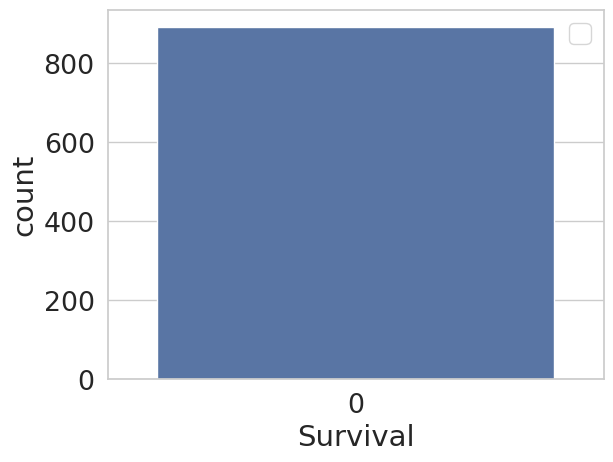

In [17]:
g = sns.countplot(train['Survived'])
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"]) # "0=Died", "1=Survived"